In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\gabbe\OneDrive\Documents\Mall_Customers.xlsx")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


ValueError: dictionary update sequence element #0 has length 1; 2 is required

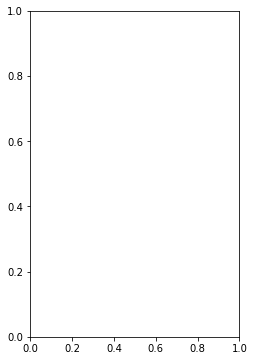

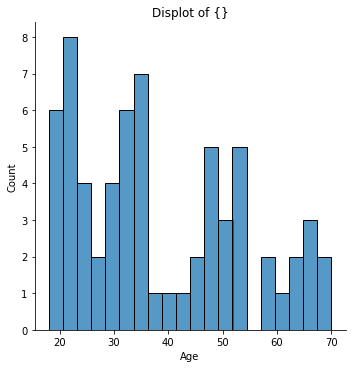

In [6]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age','Annual Income(k$)','Spending Score(1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.displot(df[x],bins=20)
  plt.title('Displot of {}',format(x))
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

ValueError: Could not interpret input 'Annual Income(k$)'

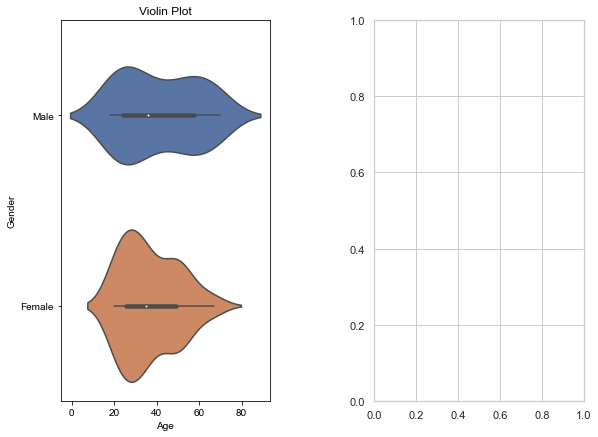

In [10]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age','Annual Income(k$)','Spending Score(1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5 , wspace=0.5)
  sns.violinplot(x=cols, y='Gender', data = df)
  plt.ylabel('Gender' if n==1 else'')
  plt.title('Violin Plot')
plt.show()

In [11]:
df.shape

(65, 5)

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,65.00000,65.000000,65.000000,65.000000
mean,33.00000,38.553846,31.384615,50.030769
std,18.90767,15.339930,10.403864,26.593567
min,1.00000,18.000000,15.000000,3.000000
25%,17.00000,24.000000,21.000000,32.000000
50%,33.00000,35.000000,33.000000,51.000000
75%,49.00000,50.000000,40.000000,73.000000
max,65.00000,70.000000,48.000000,99.000000


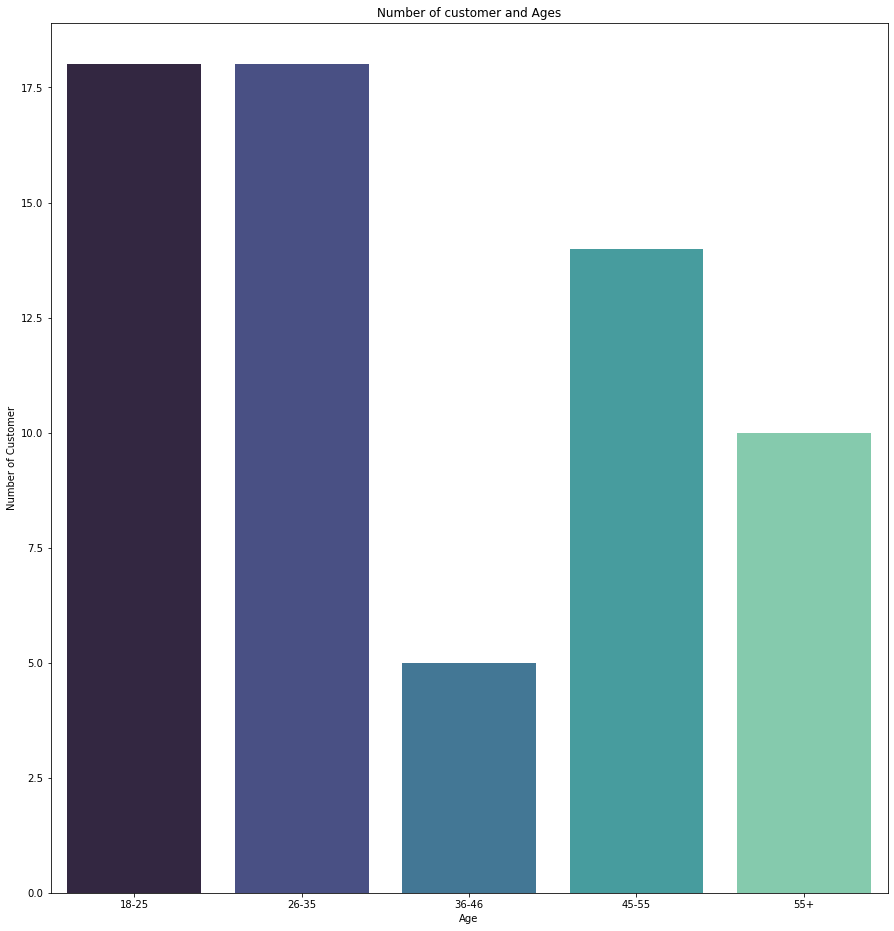

In [9]:
age_18_25=df.Age[(df.Age>=18)&(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
age_55above=df.Age[df.Age>=56]

agex=["18-25","26-35","36-46","45-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,16))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


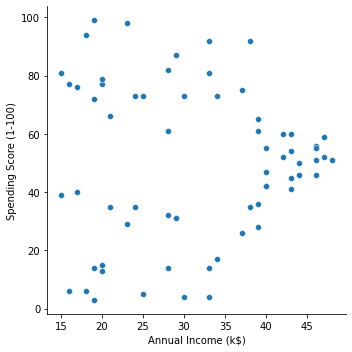

In [8]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

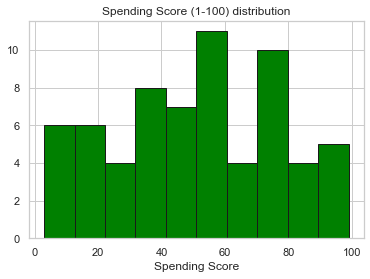

In [21]:
plt.plot(figsize=(8,5))
plt.hist(df["Spending Score (1-100)"], color='green', edgecolor='k')
plt.title("Spending Score (1-100) distribution")
plt.xlabel("Spending Score")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

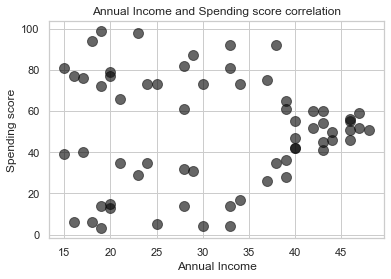

In [23]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color='black', edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

X1=df.loc[:,["Age" , "Spending Score(1-100)"]].values

from sklearn.cluster import KMeans

for k in range(1,11):
    wcss []
    kMeans=KMeans(n_clusters=k,init="k-means++")
    kMeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

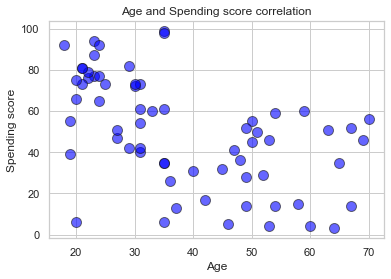

In [24]:
plt.plot(figsize=(8,5))
plt.scatter(df["Age"], df["Spending Score (1-100)"], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.title("Age and Spending score correlation")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

In [26]:
X = df.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[43 41]
 [44 50]
 [44 46]
 [46 51]
 [46 46]
 [46 56]
 [46 55]
 [47 52]
 [47 59]
 [48 51]]


In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [29]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 4 0 4 0 4 0 2 0 2 0 4 0 4 0 2 0 2 0 2 0 2
 0 1 0 1 0 1 3 1 3 3 1 1 1 3 3 3 3 1 1 3 1 3 1 3 3 3 3 3]


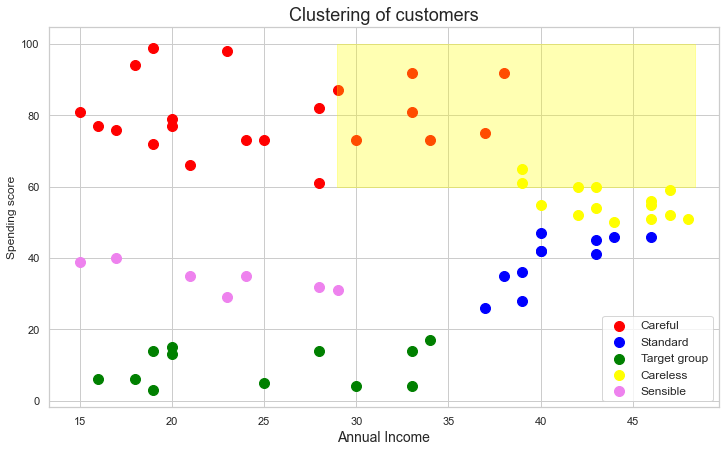

In [31]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='yellow', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='violet', label='Sensible')

plt.title("Clustering of customers", fontsize=18)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending score", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()


C:\Users\gabbe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


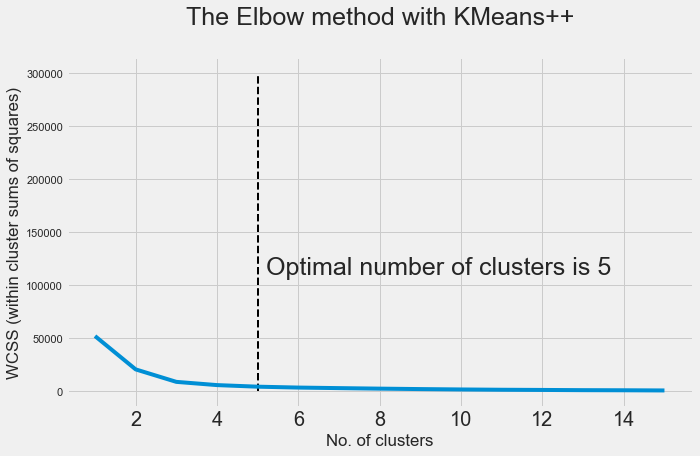

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):   #To set background style of plot
    plt.figure(figsize=(10,6))
    plt.plot(range(1,16), wcss)
    plt.title("The Elbow method with KMeans++\n", fontsize=25)
    plt.xlabel("No. of clusters")
    plt.ylabel("WCSS (within cluster sums of squares)")
    plt.xticks(fontsize=20)
    
    plt.vlines(x=5, ymin=0, ymax=300000, linestyle="--", color="black", lw=2)
    
    plt.text(x=5.2, y=110000, s="Optimal number of clusters is 5", fontsize=25)
    
    plt.show()

C:\Users\gabbe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


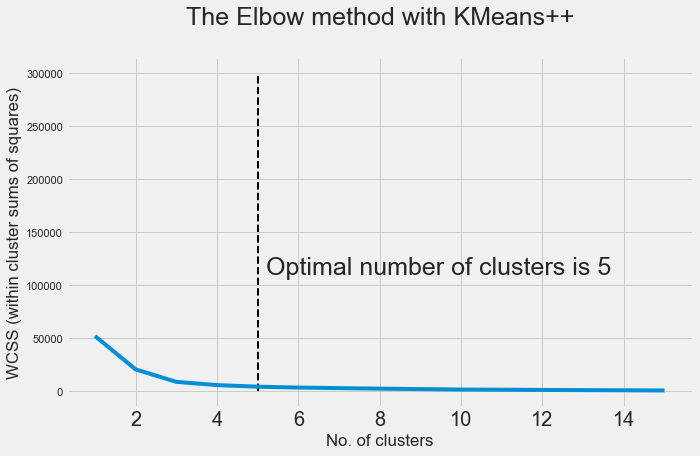

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):   #To set background style of plot
    plt.figure(figsize=(10,6))
    plt.plot(range(1,16), wcss)
    plt.title("The Elbow method with KMeans++\n", fontsize=25)
    plt.xlabel("No. of clusters")
    plt.ylabel("WCSS (within cluster sums of squares)")
    plt.xticks(fontsize=20)
    
    plt.vlines(x=5, ymin=0, ymax=300000, linestyle="--", color="black", lw=2)
    
    plt.text(x=5.2, y=110000, s="Optimal number of clusters is 5", fontsize=25)
    
    plt.show()

In [35]:
km = KMeans(n_clusters=5, max_iter=100)
km.fit(X)
y_km = km.fit_predict(X)

No handles with labels found to put in legend.


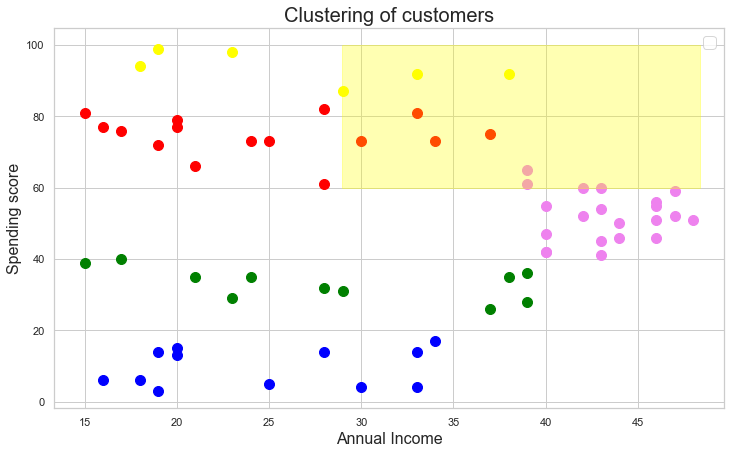

In [36]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='violet')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=100, c='green')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=100, c='yellow')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()
